In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train_ctrUa4K.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.drop(['Loan_ID'], axis = 1, inplace = True)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

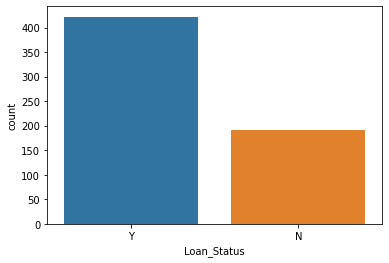

In [6]:
sns.countplot(x = 'Loan_Status', data = data)

In [7]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
X = data.drop(['Loan_Status'], axis = 1)
Y = data[['Loan_Status']]

In [10]:
num = X.select_dtypes(include='number')
char = X.select_dtypes(include='object')

In [11]:
num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [12]:
num['Credit_History'].unique()

array([ 1.,  0., nan])

In [13]:
char['Credit_History'] = num['Credit_History']

In [14]:
del num['Credit_History']

In [15]:
num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


In [16]:
char.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History
0,Male,No,0,Graduate,No,Urban,1.0
1,Male,Yes,1,Graduate,No,Rural,1.0
2,Male,Yes,0,Graduate,Yes,Urban,1.0
3,Male,Yes,0,Not Graduate,No,Urban,1.0
4,Male,No,0,Graduate,No,Urban,1.0


In [17]:
num.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
dtype: int64

In [18]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=3)
num = pd.DataFrame(knn.fit_transform(num), columns = num.columns)

In [19]:
num.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [20]:
char.isnull().sum()

Gender            13
Married            3
Dependents        15
Education          0
Self_Employed     32
Property_Area      0
Credit_History    50
dtype: int64

In [21]:
char.isnull().mean()

Gender            0.021173
Married           0.004886
Dependents        0.024430
Education         0.000000
Self_Employed     0.052117
Property_Area     0.000000
Credit_History    0.081433
dtype: float64

In [22]:
for column in char.columns:
    char[column].fillna(char[column].mode()[0], inplace = True)

In [23]:
char.isnull().sum()

Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Property_Area     0
Credit_History    0
dtype: int64

In [24]:
num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,138.0,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


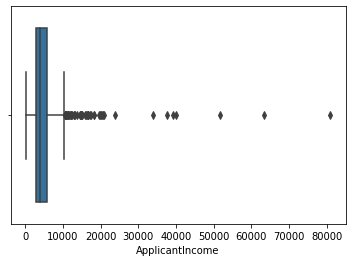

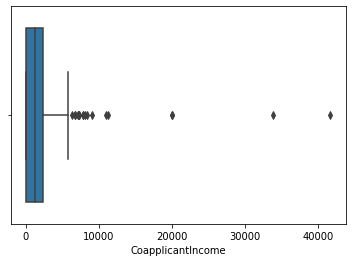

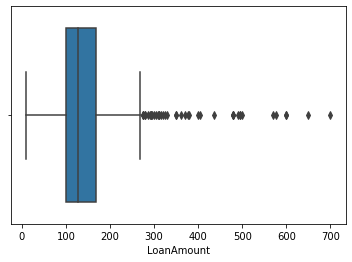

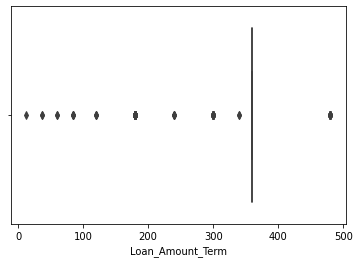

In [25]:
for column in num.columns:
    plt.figure()
    sns.boxplot(num[column])

In [26]:
for column in num.columns:
    q1 = num[column].quantile(0.25)
    q3 = num[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    num[column] = np.where(num[column]<lower, lower, num[column])
    num[column] = np.where(num[column]>upper, upper, num[column])

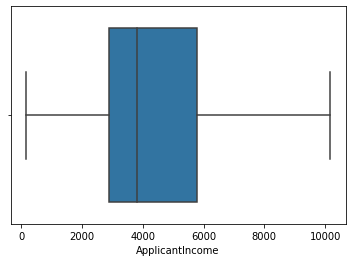

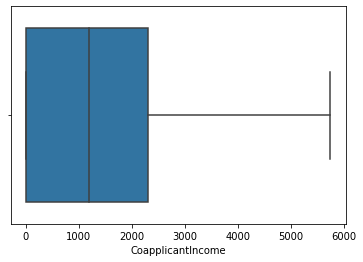

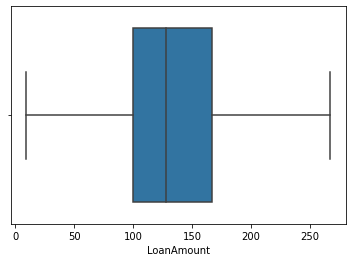

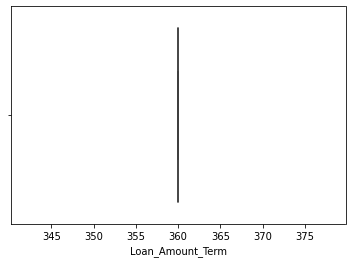

In [27]:
for column in num.columns:
    plt.figure()
    sns.boxplot(num[column])

In [28]:
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
num_binned = pd.DataFrame(kbins.fit_transform(num), columns = num.columns)

In [29]:
num_binned.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,7.0,0.0,6.0,0.0
1,6.0,1.0,5.0,0.0
2,2.0,0.0,0.0,0.0
3,1.0,3.0,4.0,0.0
4,7.0,0.0,6.0,0.0


In [32]:
num_binned_Y.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,7.0,0.0,6.0,0.0,Y
1,6.0,1.0,5.0,0.0,N
2,2.0,0.0,0.0,0.0,Y
3,1.0,3.0,4.0,0.0,Y
4,7.0,0.0,6.0,0.0,Y


In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['Loan_Status'] = pd.DataFrame(le.fit_transform(Y['Loan_Status']), columns = ['Loan_Status'])

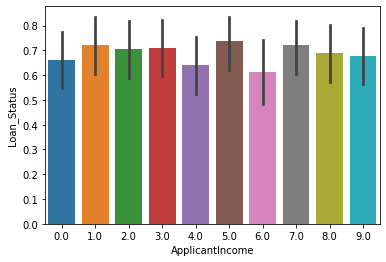

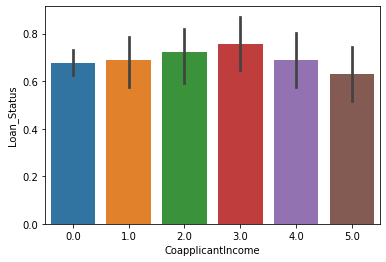

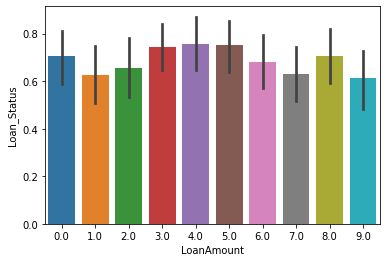

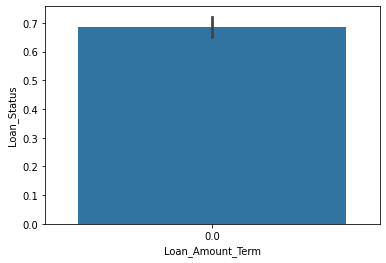

In [34]:
num_binned_Y = pd.concat([num_binned,Y], axis = 1)
for column in num_binned.columns:
    plt.figure()
    sns.barplot(x = column, y = "Loan_Status", data = num_binned_Y)

In [37]:
num.drop(['Loan_Amount_Term'], axis = 1, inplace = True)

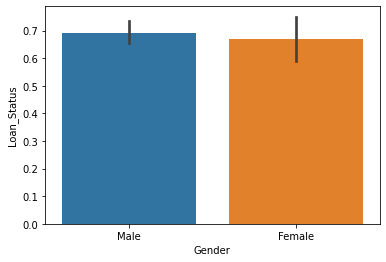

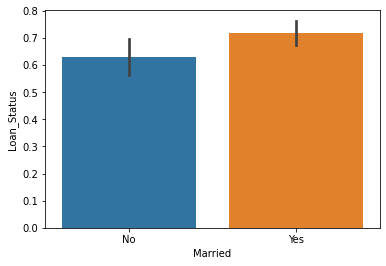

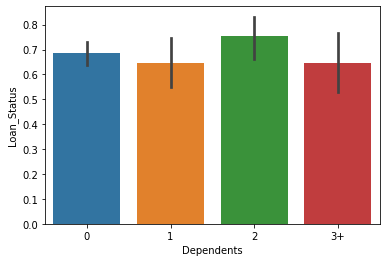

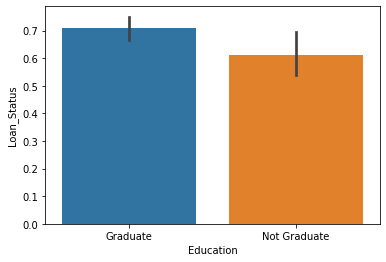

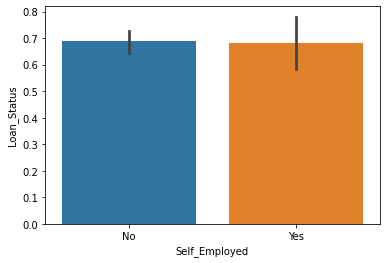

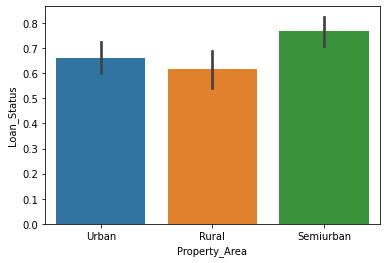

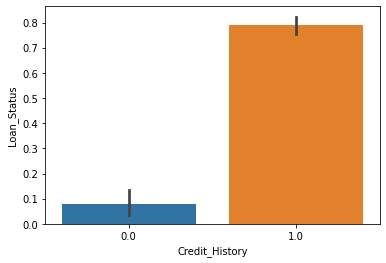

In [38]:
char_Y = pd.concat([char,Y], axis = 1)
for column in char.columns:
    plt.figure()
    sns.barplot(x = column, y = "Loan_Status", data = char_Y)

In [40]:
for column in char.columns:
    char[column] = pd.DataFrame(le.fit_transform(char[column]), columns = [column])

In [41]:
char.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,1
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


In [42]:
X = pd.concat([num,char], axis = 1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X), columns = X.columns)

In [43]:
X_std.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History
0,0.497164,-0.874587,-0.000551,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,1.223298,0.411733
1,-0.013767,0.054395,-0.174185,0.472343,0.728816,0.253470,-0.528362,-0.392601,-1.318513,0.411733
2,-0.652632,-0.874587,-1.250711,0.472343,0.728816,-0.737806,-0.528362,2.547117,1.223298,0.411733
3,-0.820924,0.578025,-0.313091,0.472343,0.728816,-0.737806,1.892641,-0.392601,1.223298,0.411733
4,0.558104,-0.874587,0.051539,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,1.223298,0.411733


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.3, random_state=23)

In [47]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
Y_pred = log_reg.predict(X_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
print(accuracy_score(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))
print(recall_score(Y_test,Y_pred))
print(roc_auc_score(Y_test,Y_pred))

0.7621621621621621
0.7364864864864865
0.956140350877193
0.7034222881146528


In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train,Y_train)
Y_pred_rfc = rfc.predict(X_test)
print(accuracy_score(Y_test,Y_pred_rfc))
print(precision_score(Y_test,Y_pred_rfc))
print(recall_score(Y_test,Y_pred_rfc))
print(roc_auc_score(Y_test,Y_pred_rfc))

0.7567567567567568
0.7593984962406015
0.8859649122807017
0.7176303434642946
